In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
df = pd.read_csv('coin.csv')
N = df['Experiment_Id'].size
y = df['Toss_Result']


In [20]:
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |████████▋ | 00:00 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [21]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,3300.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,2900.0,1.0


In [22]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

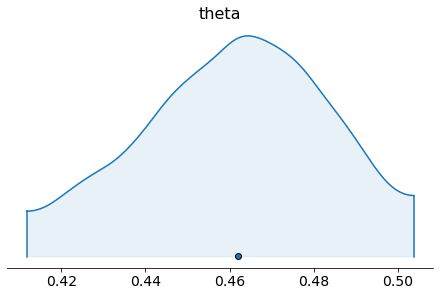

In [23]:
#Plot
az.plot_density(arviz_result,shade=0.1)